<a href="https://colab.research.google.com/github/RUMCS/Side-projects/blob/master/CreditFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine
Last Updated: a year ago (Version 3)
About this Dataset
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project
[link text](https://)

In [2]:
## Upload selected files to godrive

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving creditcardNew.csv to creditcardNew.csv
User uploaded file "creditcardNew.csv" with length 150828752 bytes


In [3]:
## LIST FILES IN GODRIVE
print("Files in Drive:")
!ls ./*

Files in Drive:
./creditcard.csv  ./creditcardNew.csv

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
# Import libraries 
import pandas as pd
import numpy as np

#import display for DataFrame usage
from IPython.display import display

# Load the credit card transactions dataset
data = pd.read_csv("./creditcardNew.csv")

In [0]:
## Replacing all NaNs with 0's NO NEED TO RUN EITH THE NEW DATASET!
data = data.fillna(0)

In [0]:
data_class_outcomes = data['Class']
#preserving only necessary columns 
data.drop(['Class'], axis = 1, inplace = True)

In [7]:
#import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [0]:
#Classifier = RFC
from sklearn.ensemble import RandomForestClassifier

def implement_rfc(X_train,y_train,X_test):
    """
    This function fits and transforms data using 
    Random Forest Classifier technique and 
    returns the y_pred value
    """
    clf_B = RandomForestClassifier(n_estimators=98)
    clf_B.fit(X_train, y_train)
    y_pred = clf_B.predict(X_test)
    return y_pred

In [0]:
y_pred = implement_rfc(X_train,y_train,X_test)

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [0]:
from sklearn.metrics import confusion_matrix
def calculate_confusion_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

In [0]:
result_confusion_matrix = calculate_confusion_matrix(y_test, y_pred)

In [0]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[71083     6]
 [   25    88]]


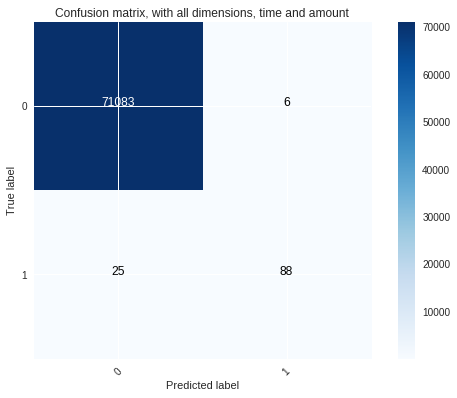

In [14]:
import numpy as np
import itertools
class_names = [0,1]
plot_confusion_matrix(result_confusion_matrix, classes=class_names,title='Confusion matrix, with all dimensions, time and amount')

In [0]:
import collections
def calculate_add_scores(confusion_matrix,Classifier="RFC"):
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    precision = (TP/TP+FP)
    recall = (TP/TP+FN)
    values = [{'Classifier':Classifier,'Accuracy':accuracy,'Precision':precision,
              'Recall':recall}]
    dataframe = pd.DataFrame(values,columns=values[0].keys())
    return dataframe

In [16]:
df = calculate_add_scores(result_confusion_matrix)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999565        7.0    26.0


In [17]:
## TESTING data, there is no "TIME" column to drop
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [0]:

data_time_outcomes = data['Time']
#preserving only necessary columns 
data.drop(['Time'], axis = 1, inplace = True)

In [19]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [0]:
y_pred = implement_rfc(X_train,y_train,X_test)

In [0]:
confusion_matrix_1 = calculate_confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[71085     4]
 [   24    89]]


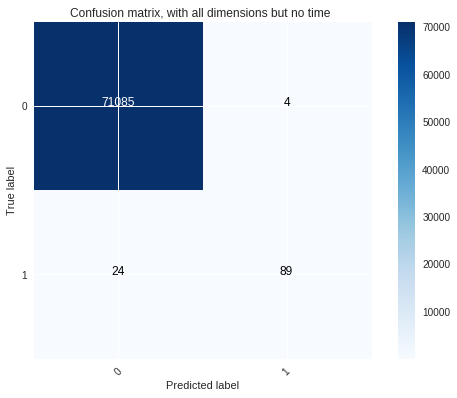

In [23]:
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_1, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time ')

In [24]:
new_df = calculate_add_scores(confusion_matrix_1)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999565        7.0    26.0
0        RFC  0.999607        5.0    25.0


In [25]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [26]:
data_amount_outcomes = data['Amount']
data.drop(['Amount'], axis = 1, inplace = True)
display(data.describe())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


Training and testing split was successful.
Confusion matrix, without normalization
[[71082     7]
 [   23    90]]


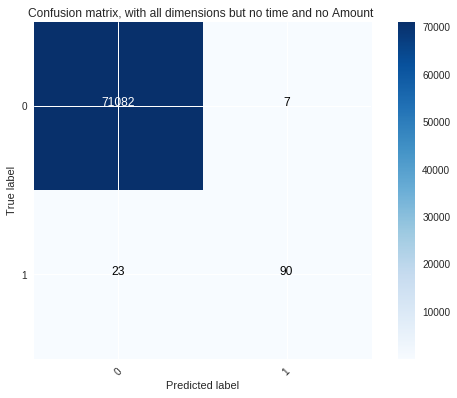

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)
print("Training and testing split was successful.")
y_pred = implement_rfc(X_train,y_train,X_test)
confusion_matrix_2 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_2, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time and no Amount ')

In [28]:
new_df = calculate_add_scores(confusion_matrix_2)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999565        7.0    26.0
0        RFC  0.999607        5.0    25.0
0        RFC  0.999579        8.0    24.0


In [0]:
from sklearn.preprocessing import normalize
normalize_array = normalize(data_amount_outcomes.values.reshape(1,-1))


In [0]:
import numpy as np
new_data = np.concatenate((data, normalize_array.T), axis=1)

Training and testing split was successful.
Confusion matrix, without normalization
[[71081     8]
 [   24    89]]


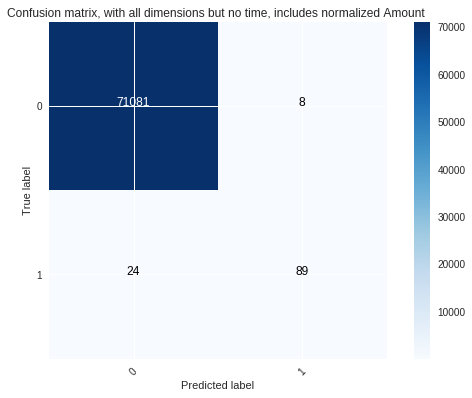

In [31]:
X_train, X_test, y_train, y_test = train_test_split(new_data,data_class_outcomes,test_size=0.25, random_state=42)
print("Training and testing split was successful.")
clf = RandomForestClassifier(n_estimators=98)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix_3 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_3, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time, includes normalized Amount ')

In [32]:
new_df = calculate_add_scores(confusion_matrix_3)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999565        7.0    26.0
0        RFC  0.999607        5.0    25.0
0        RFC  0.999579        8.0    24.0
0        RFC  0.999551        9.0    25.0


Training and testing split was successful.
Confusion matrix, without normalization
[[56862     2]
 [   22    76]]


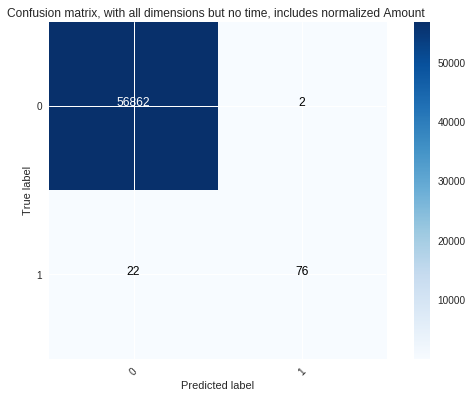

In [33]:
#try 2 with different parameters
X_train, X_test, y_train, y_test = train_test_split(new_data,data_class_outcomes,test_size=0.2, random_state=42)
print("Training and testing split was successful.")
clf = RandomForestClassifier(n_estimators=98)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix_4 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_4, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time, includes normalized Amount ')

In [34]:
new_df = calculate_add_scores(confusion_matrix_4)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999565        7.0    26.0
0        RFC  0.999607        5.0    25.0
0        RFC  0.999579        8.0    24.0
0        RFC  0.999551        9.0    25.0
0        RFC  0.999579        3.0    23.0


Training and testing split was successful.
Confusion matrix, without normalization
[[56855     9]
 [   21    77]]


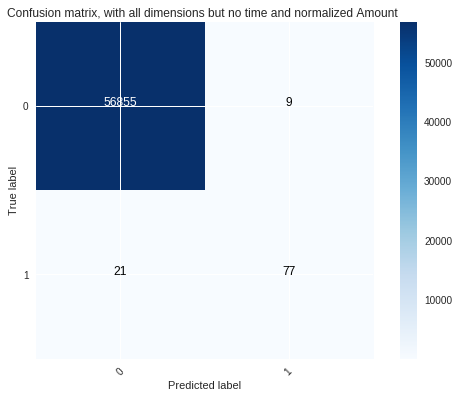

In [35]:
#Classifier = DTC, with max_depth=6
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(new_data,data_class_outcomes,test_size=0.2, random_state=42)
print("Training and testing split was successful.")
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix_4 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_4, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time and normalized Amount ')

In [36]:
new_df = calculate_add_scores(confusion_matrix_4,Classifier="DTC with max_depth=6")
frames = [df,new_df]
df = pd.concat(frames)
print(df)

             Classifier  Accuracy  Precision  Recall
0                   RFC  0.999565        7.0    26.0
0                   RFC  0.999607        5.0    25.0
0                   RFC  0.999579        8.0    24.0
0                   RFC  0.999551        9.0    25.0
0                   RFC  0.999579        3.0    23.0
0  DTC with max_depth=6  0.999473       10.0    22.0


Training and testing split was successful.
Confusion matrix, without normalization
[[56855     9]
 [   20    78]]


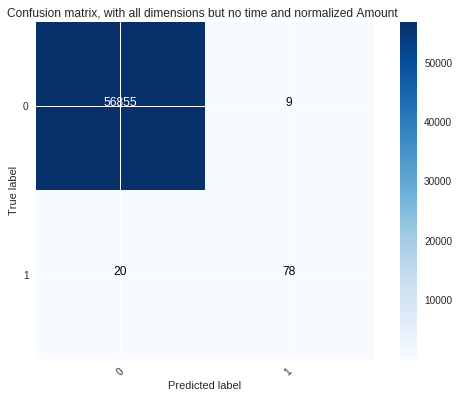

In [37]:
#Classifier = DTC, with max_depth=7
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(new_data,data_class_outcomes,test_size=0.2, random_state=42)
print("Training and testing split was successful.")
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix_5 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_5, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time and normalized Amount ')

In [38]:
new_df = calculate_add_scores(confusion_matrix_5,Classifier="DTC with max_depth=7")
frames = [df,new_df]
df = pd.concat(frames)
print(df)

             Classifier  Accuracy  Precision  Recall
0                   RFC  0.999565        7.0    26.0
0                   RFC  0.999607        5.0    25.0
0                   RFC  0.999579        8.0    24.0
0                   RFC  0.999551        9.0    25.0
0                   RFC  0.999579        3.0    23.0
0  DTC with max_depth=6  0.999473       10.0    22.0
0  DTC with max_depth=7  0.999491       10.0    21.0


In [39]:
# Above result explanation with dimesnions 
'''
RFC = Random Forest Classifier
DTC = Decision Tree Classifier

First result - RFC  including all dimensions in data set with test_size =0.25
Second result - RFC including all dimensions but time in data set with test_size =0.25
Third result - RFC including all dimensions but (time,amount) in data set with test_size =0.25
Fourth result - RFC including all dimensions but time, includes normalized amount with test_size =0.25
Fifth result - RFC including all dimensions but time, includes normalized amount with test_size =0.2
Sixth result - DTC with max_depth=6, including all dimensions but time, includes normalized 
               amount with test_size =0.2
Seventh result - DTC with max_depth=7, including all dimensions but time, includes normalized 
               amount with test_size =0.2

For optimal model of DTC max_depth is 6
'''


'\nRFC = Random Forest Classifier\nDTC = Decision Tree Classifier\n\nFirst result - RFC  including all dimensions in data set with test_size =0.25\nSecond result - RFC including all dimensions but time in data set with test_size =0.25\nThird result - RFC including all dimensions but (time,amount) in data set with test_size =0.25\nFourth result - RFC including all dimensions but time, includes normalized amount with test_size =0.25\nFifth result - RFC including all dimensions but time, includes normalized amount with test_size =0.2\nSixth result - DTC with max_depth=6, including all dimensions but time, includes normalized \n               amount with test_size =0.2\nSeventh result - DTC with max_depth=7, including all dimensions but time, includes normalized \n               amount with test_size =0.2\n\nFor optimal model of DTC max_depth is 6\n'